In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore') #Untuk menghilangkan warning-text

In [3]:
df = sns.load_dataset('titanic')
type(df.shape)

tuple

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df = df[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]
df.shape

(10000, 11)

### Tipe data dari masing-masing variabel

#### categorik : Geography, Gender, HasCrCard, IsActiveMember, Exited
#### numerik : CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary

### Univariate Visualization

In [ ]:
cat = ['Geography','Gender', 'NumOfProducts', 'HasCrCard','IsActiveMember',  'Exited']

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

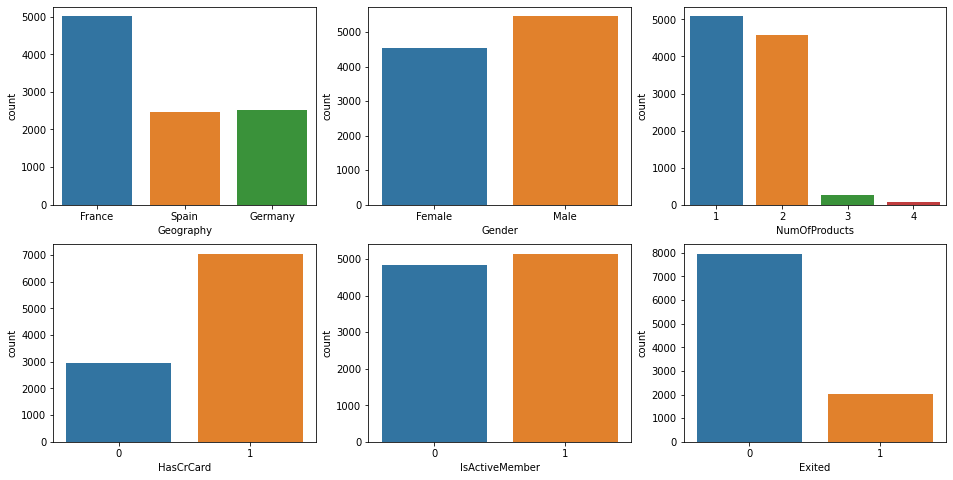

In [ ]:
plt.figure(figsize=(16,8))
idx = 1
for i in cat:
    plt.subplot(2,3,idx)
    sns.countplot(df[i])
    idx += 1
plt.show()

### Notes:
- 50% costomer bank berasal dari France
- Rata-rata produk yang dimiliki cutomers 1-2
- Rata-rata customer memiliki CC
- 20% customer keluar dari bank

In [ ]:
num = [i for i in list(df.columns) if i not in cat]
num.append('NumOfProducts')
num

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'NumOfProducts']

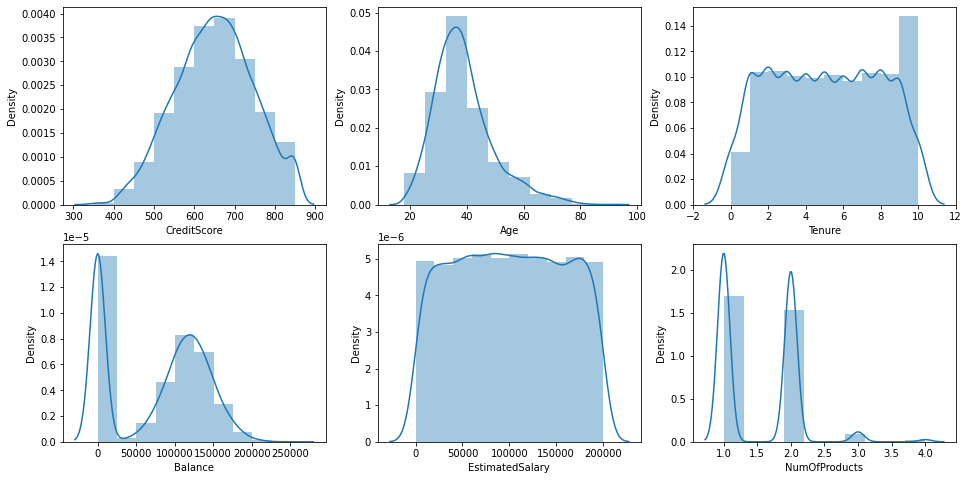

In [ ]:
plt.figure(figsize=(16,8))
idx = 1
for i in num:
    plt.subplot(2,3,idx)
    #plt.title(f"{i}")
    sns.distplot(df[i], bins=10)
    #plt.hist(df[i])
    idx += 1
plt.show()

### Bivariate Visualization

#### Numerik-Numerik

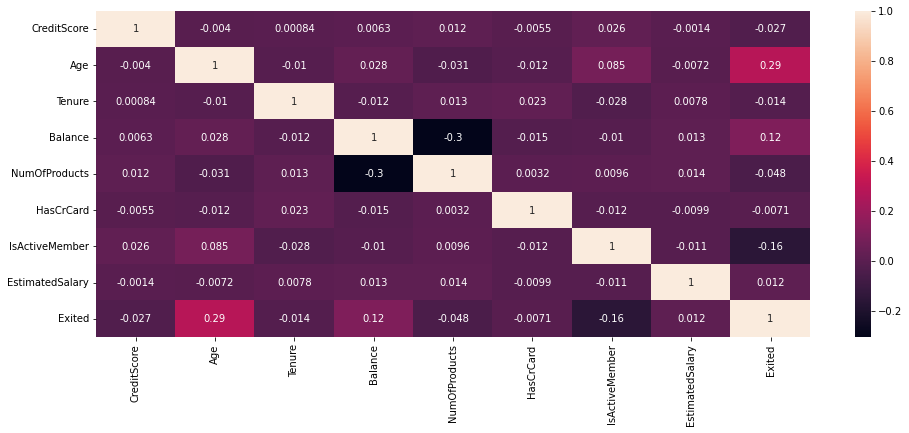

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Notes :
### Corr >= +- 0.5 : high correlation
### Corr >= +- 0.1 and +- <0.5 good correlation
### COrr < +- 0.1 poor correlation
#### Umur dan exit memiliki korelasi

### Numeric vs Categoric

In [ ]:
num

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'NumOfProducts']

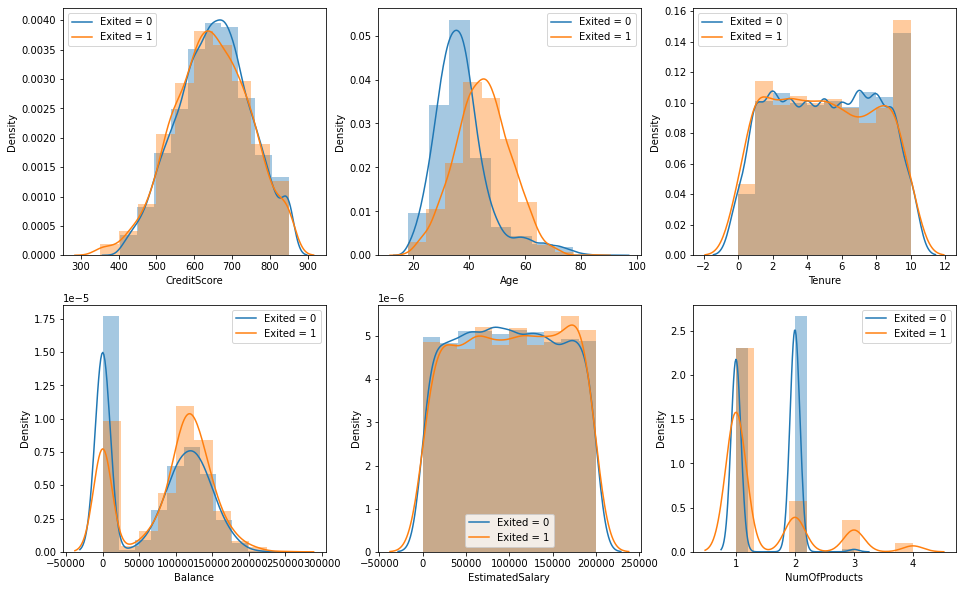

In [ ]:
plt.figure(figsize=(16,10))
idx = 1
for i in num:
    plt.subplot(2,3,idx)
    sns.distplot(df[df.Exited==0][i], bins=10)
    sns.distplot(df[df.Exited==1][i], bins=10)
    plt.legend(["Exited = 0", "Exited = 1"])
    idx += 1
plt.show()

### Notes :
- Creditsore untuk yang exit dan tidak overlaping/ hampir sama. Di sini dapat disimpulkan credit score tidak dapa menjelaskan kenapa ccustomer exit. Dengan kata lain Credit score tidak memperoleh informasi yang berarti terkait customer tesrebut exit.
- Rata-rata customer yang berumur 30-45 tahun tidak keluar dari bank

### Categoric vs Categoric

In [ ]:
cat

['Geography',
 'Gender',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

In [ ]:
cat_p = pd.crosstab(df['Geography'], df["Gender"])
cat_p

Gender,Female,Male
Geography,,
France,2261,2753
Germany,1193,1316
Spain,1089,1388


### Multivariate Visualization

### Numeric vc Numeric vc Categorical

In [ ]:
df2 = df[num]
df2["Exited"] = df['Exited']

<Figure size 1152x360 with 0 Axes>

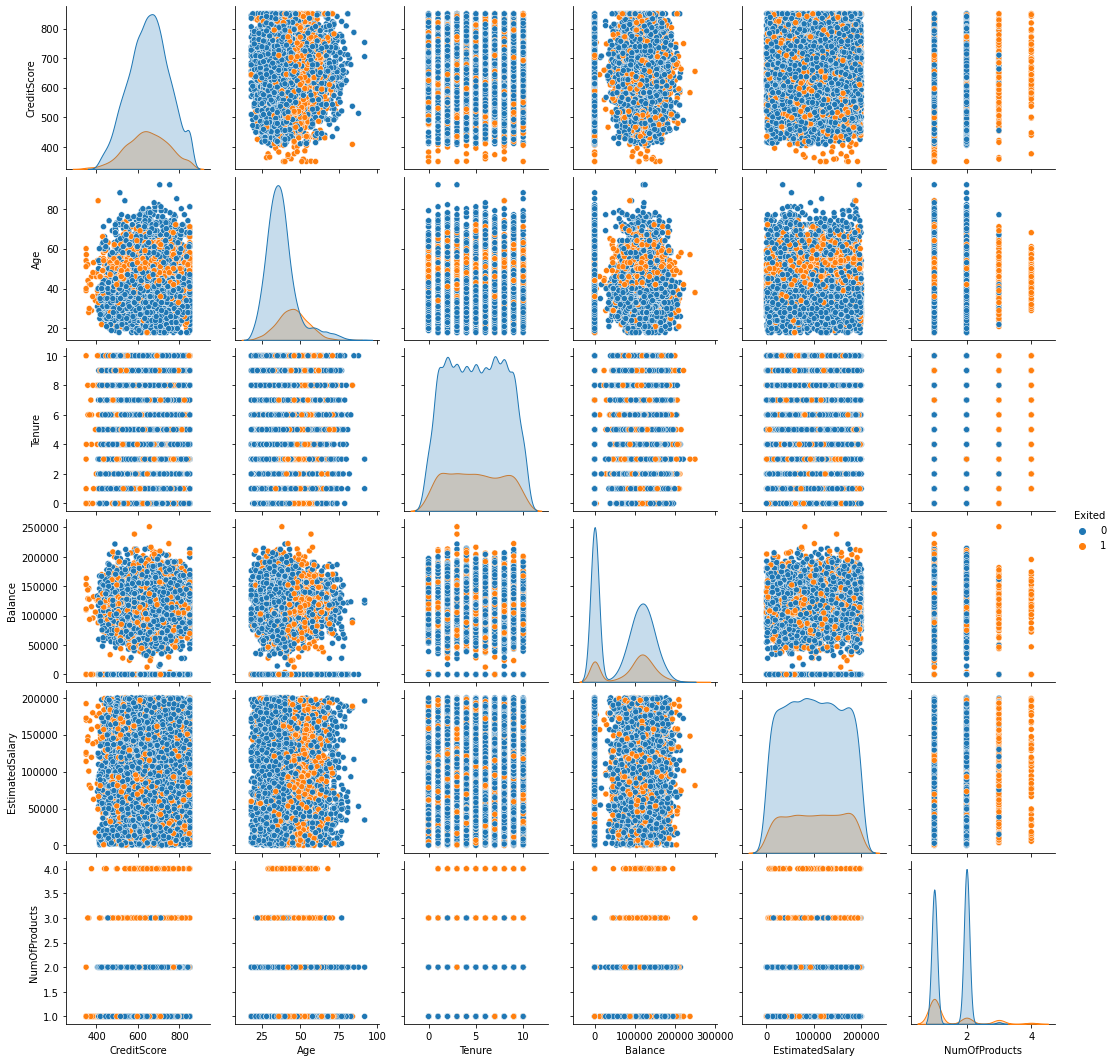

In [ ]:
plt.figure(figsize=(16,5))
sns.pairplot(df2, hue='Exited')
plt.show()

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
cat=['survived','pclass','sex','embarked','class','who','adult_male', 'deck','embark_town','alive','alone']
num=['age', 'fare','sibsp','parch']

**UNIVARIATE**

###Categoric

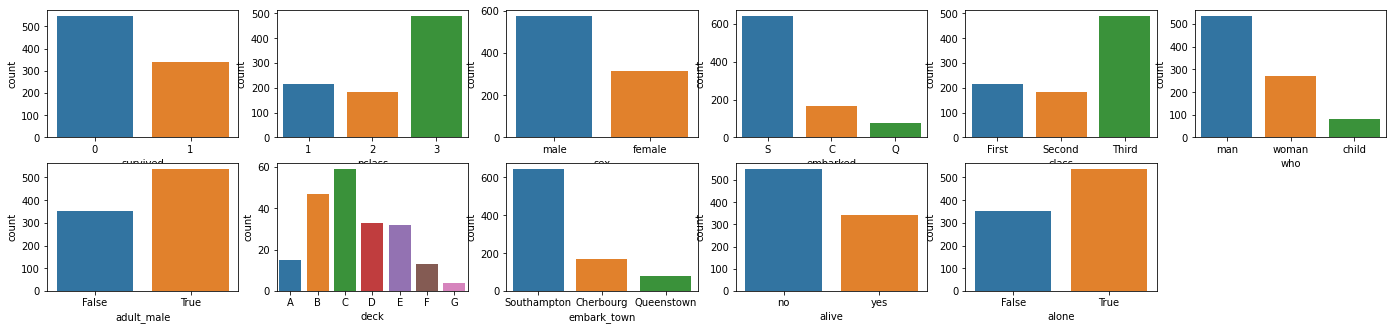

In [ ]:
plt.figure(figsize=(24,8))
idx = 1
for i in cat:
    plt.subplot(3,6,idx)
    sns.countplot(titanic[i])
    idx += 1
plt.show()

###Numeric

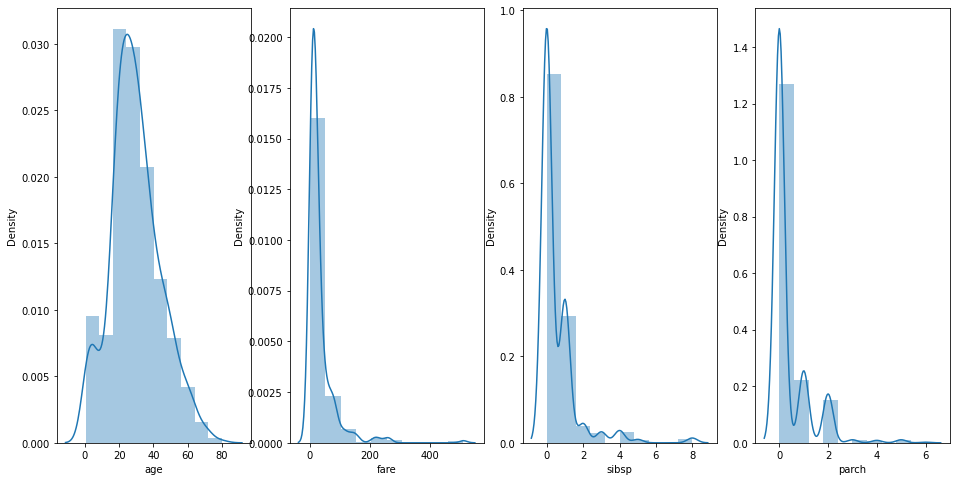

In [ ]:
plt.figure(figsize=(16,8))
idx = 1
for i in num:
    plt.subplot(1,4,idx)
    #plt.title(f"{i}")
    sns.distplot(titanic[i], bins=10)
    #plt.hist(df[i])
    idx += 1
plt.show()

**BIVARIATE**

###Numeric - Numeric

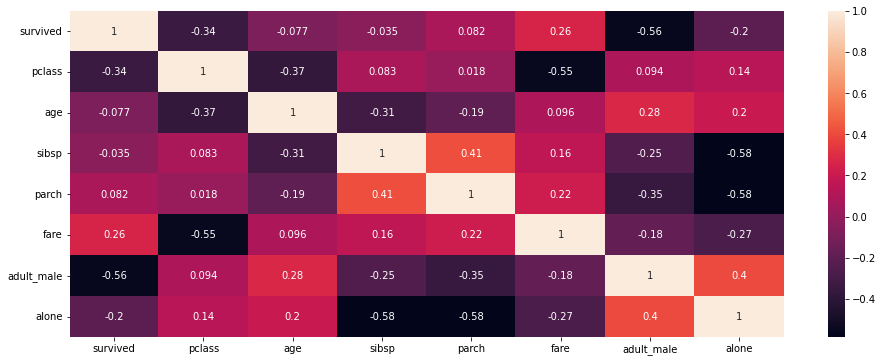

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(titanic.corr(), annot=True)
plt.show()

###Numeric - Categoric

In [ ]:
num

['age', 'fare', 'sibsp', 'parch']

In [ ]:
cat

['survived',
 'pclass',
 'sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

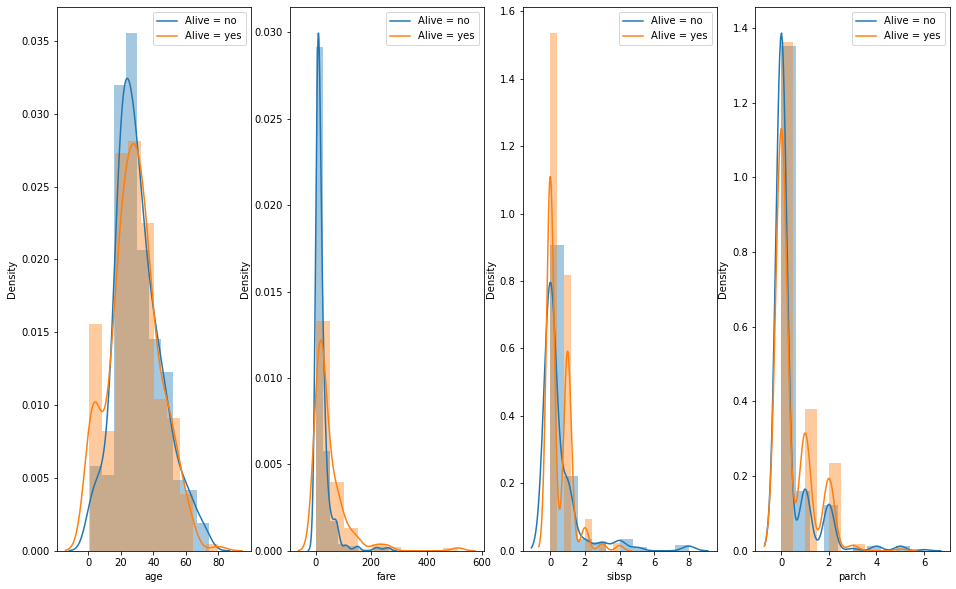

In [ ]:
plt.figure(figsize=(16,10))
idx = 1
for i in num:
    plt.subplot(1,4,idx)
    sns.distplot(titanic[titanic.alive=='no'][i], bins=10)
    sns.distplot(titanic[titanic.alive=='yes'][i], bins=10)
    plt.legend(["Alive = no", "Alive = yes"])
    idx += 1
plt.show()

###Categoric - Categoric

In [ ]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [ ]:
new = pd.crosstab(titanic['alive'], titanic['embark_town'])
new

embark_town,Cherbourg,Queenstown,Southampton
alive,,,
no,75,47,427
yes,93,30,217


**MULTIVARIATE**

###Numeric - Numeric - Categoric

In [ ]:
titanic2 = titanic[num]
titanic2['alive'] = titanic['alive']

<Figure size 1152x360 with 0 Axes>

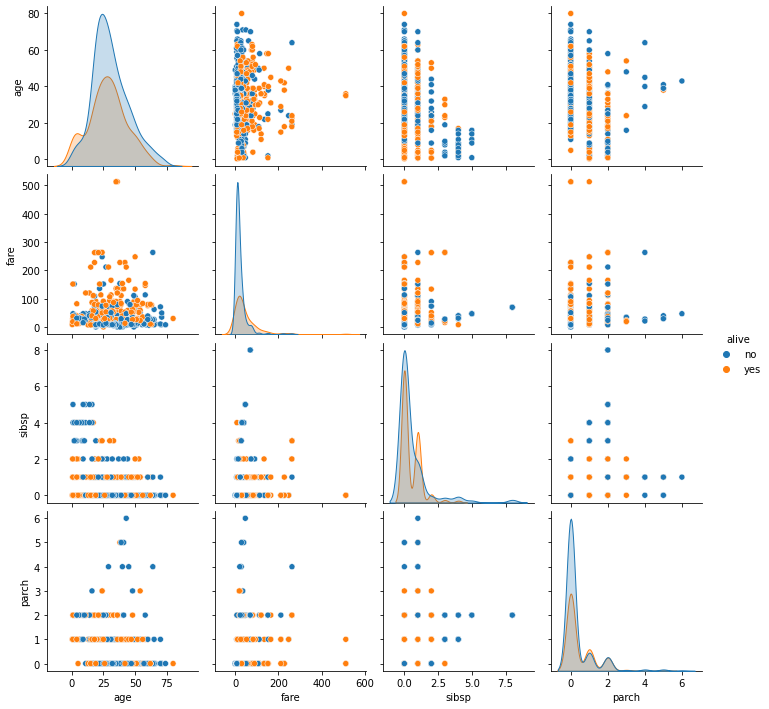

In [ ]:
plt.figure(figsize=(16,5))
sns.pairplot(titanic2, hue='alive')
plt.show()

###Categoric - Categoric - Numeric

In [ ]:
cat

['survived',
 'pclass',
 'sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [ ]:
num

['age', 'fare', 'sibsp', 'parch']